Одним из интересных способов анализа временного ряда является экспоненциальное сглаживание. Давайте разберёмся, что это такое и чем оно отличается от других методов прогнозирования.

## **Экспоненциальное сглаживание** — это метод прогнозирования временных рядов для одномерных данных с трендом или сезонным компонентом. Оно также известно как метод простого экспоненциального сглаживания, или метод Брауна.

Формула для получения экспоненциального сглаживания выглядит так:

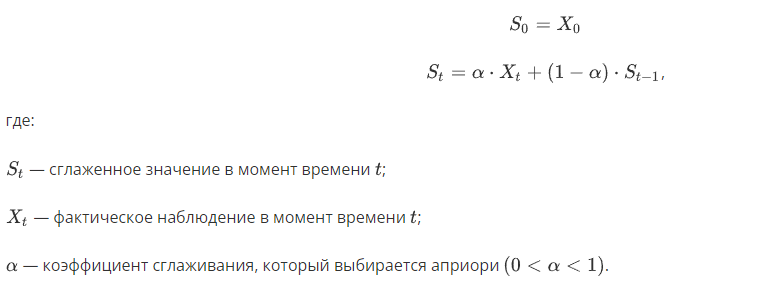

Обратите внимание, что формулу необязательно заучивать: главное — чтобы вы понимали принцип работы алгоритма.

В случае с этой формулой каждый новый элемент временного ряда рассчитывается от предыдущего и от сглаженного исходного.

Рассмотрим пример.

Нам известны значения температуры за прошедший месяц, и мы хотим предсказать погоду на следующий день. Мы можем предположить, что в этом случае погода завтра в большей степени будет зависеть от погоды вчера и сегодня, чем от погоды 30 дней назад. Если мы хотим учитывать удалённость значений от текущего момента, то экспоненциальное сглаживание пригодится тут как нельзя кстати.

Проще говоря, под экспоненциальным сглаживанием понимается взвешенная линейная сумма наблюдений, при этом веса для наблюдений экспоненциально уменьшаются для более старых наблюдений. Тем самым мы не обращаем особого внимания на поведение в прошлом, а недавнему поведению присваиваем больший вес. Если быть точнее, наблюдения взвешиваются с геометрически уменьшающимся коэффициентом.

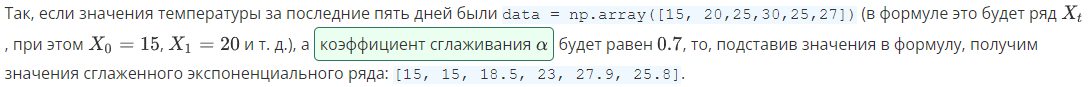

In [2]:
import pandas as pd
import numpy as np

In [3]:
def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(7)
s[0] = data[0]

for i in range(1, len(data)):
    s[i] = exp_smth(data[i], a, s[i-1])

print(s)

[15.      18.5     23.05    27.915   25.8745  26.66235  0.     ]


Так как по формуле значение для следующего дня рассчитывается от значения для текущего, мы можем продолжить получать следующие значения для экспоненциально сглаженного ряда, таким образом совершая прогноз (день за днём). В нашем примере для шестого дня мы получили прогнозируемое значение температуры в 26.6 градусов (26.66235, если быть точнее):

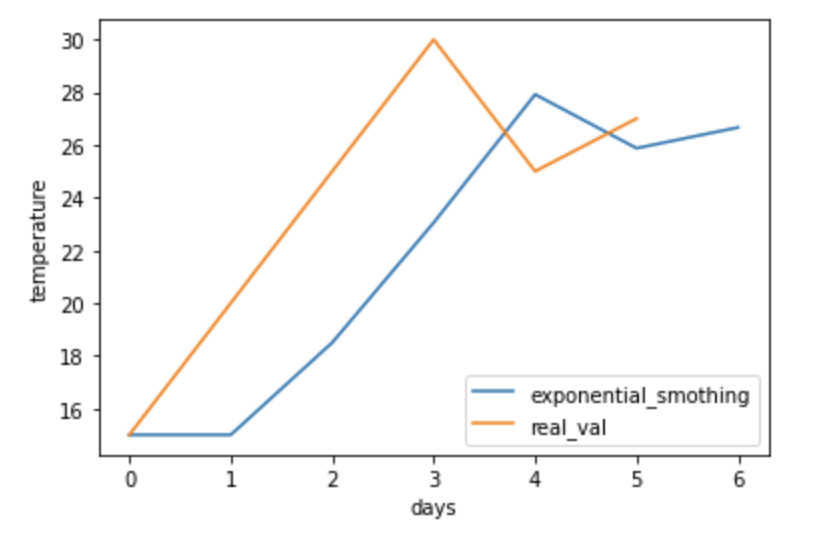

Коэффициент экспоненциального сглаживания подбирается интуитивно. Чем выше коэффициент, тем меньше внимания мы обращаем на старые данные. Если коэффициент близок к 0, данным в далёком прошлом будет уделено больше внимания. Так, при коэффициенте, равном 0.1, значения экспоненциально сглаженного ряда будут выглядеть так (сравните с предыдущим графиком):

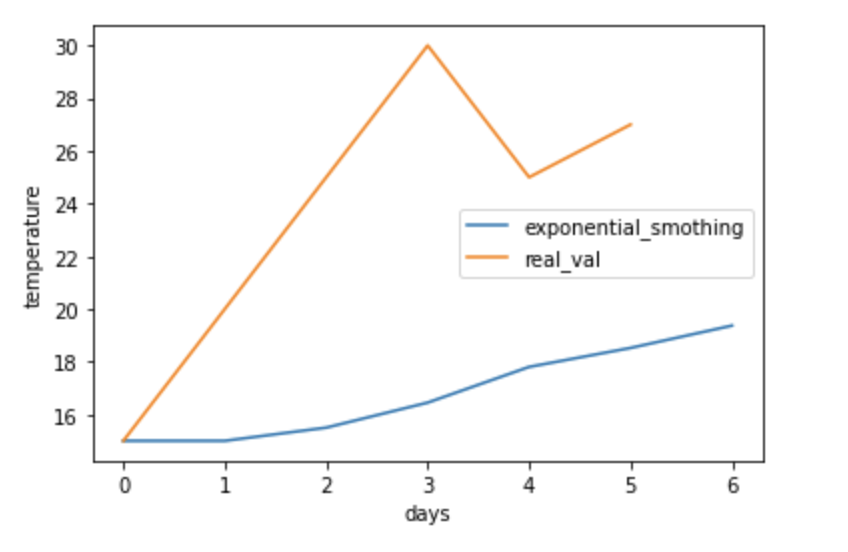



В примере выше сглаженный ряд мы рассчитывали «вручную» по формуле, но делать это каждый раз нет необходимости, так как эта возможность уже встроена в библиотеку statsmodels. Для совершения предсказания методом простого экспоненциального сглаживания воспользуемся методом SimpleExpSmoothing из statsmodels.tsa.api.

Попробуйте запустить код ниже:

In [4]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast(1)

print(forecast)

[26.66235]


Простое экспоненциальное сглаживание используется в задачах сглаживания и краткосрочного прогнозирования временных рядов.

В следующем юните мы познакомимся с ещё одной важной характеристикой временного ряда, а пока предлагаем вам ознакомиться с дополнительной литературой по изученной теме и выполнить несколько заданий.

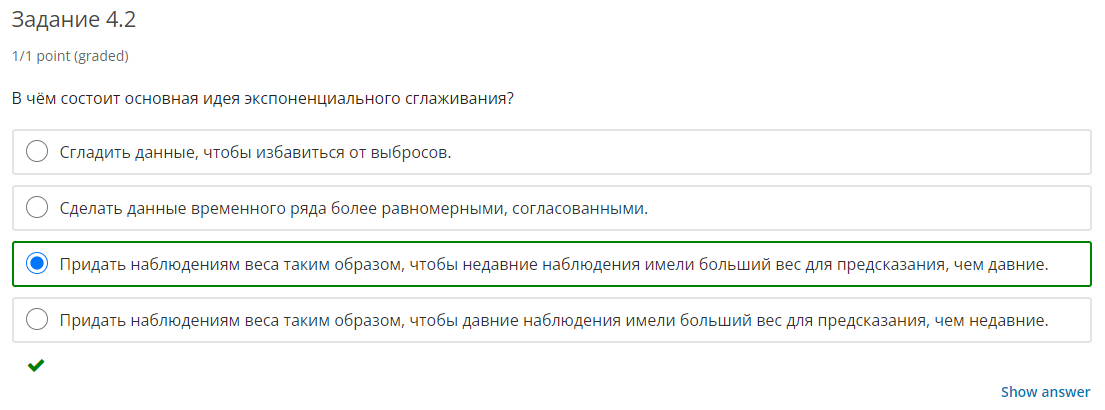

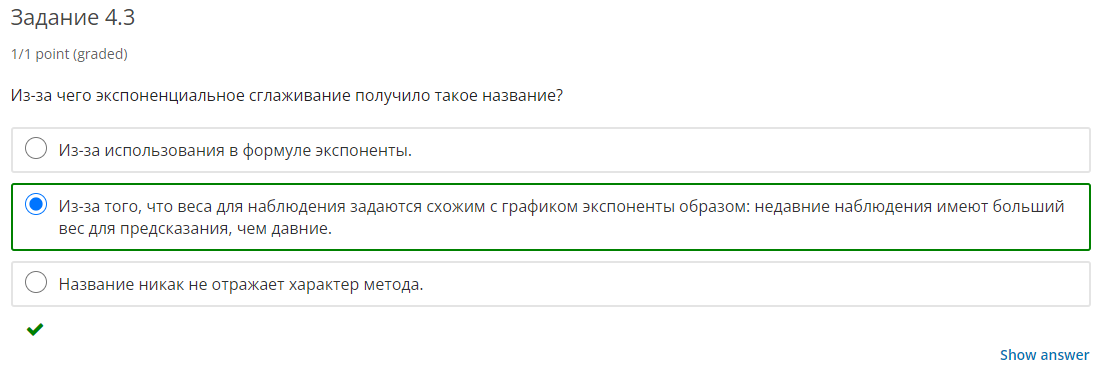